## Customer Segmentation using K-Means Clusteringing

This project aims to segment customers baic and behavioral attributes using K-Means Clustering. By analyzing the provided dataset, we can group customers into different segments, which helps businesses tailor their marketing strategies and improve customer experience.

### Features:
- **Data Exploration**: Initial exploration of the data includes descriptive statistics, visualizations, and data preprocessing steps.
- **K-Means Clustering**: Implementation of the K-Means algorithm to identify distinct customer segments based on Age, Annual Income, and Spending Score.
- **Evaluation**: Assessing the quality of the clusters using metrics such as the silhouette score and visualizing the clusters for interpretability.
- **Visualization**: Detailed plots of the clustered data points, including scatter plots with clusters color-coded to show the relationship between different features.

### Technologies Used:
- **Python**: The primary programming language used for implementing the project.
- **Pandas**: For data manipulation and preprocessing.
- **Scikit-learn**: To implement the K-Means algorithm and evaluate cluster quality.
- **Matplotlib and Seaborn**: For creating visualizations to understand the dataset and the r
  r additional details!


## Import Relevant Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import  MinMaxScaler 
from sklearn.cluster import KMeans

In [2]:
raw_data = pd.read_csv("D:\\Data_Science_Project\\Project_4\\Mall_Customers.csv")
raw_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = raw_data.copy()

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data preprocessing 

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


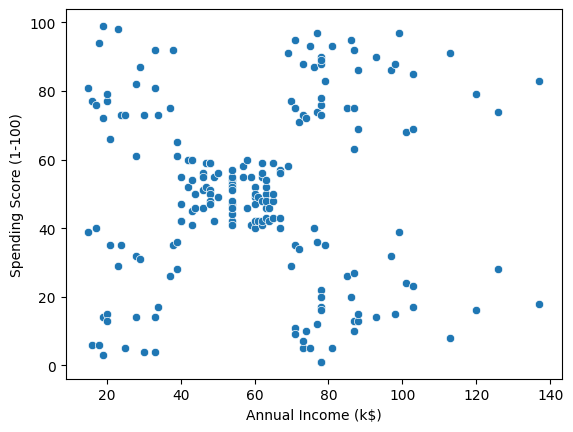

In [8]:
sns.scatterplot(x= 'Annual Income (k$)',y= 'Spending Score (1-100)',data = df)
plt.show()

## Normalization

In [9]:
cols = ['Annual Income (k$)','Spending Score (1-100)']
scaled = MinMaxScaler()
df[cols] = pd.DataFrame(scaled.fit_transform(df[cols]),columns = cols)

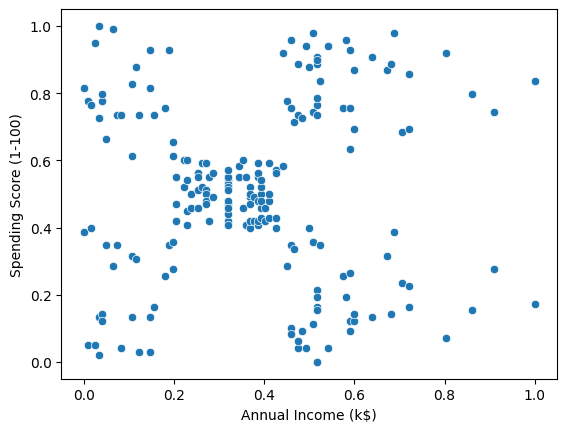

In [10]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.show()

## Preparing Data for clustering


In [11]:
x= df.iloc[:,[3,4]].values

In [12]:
x

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

## Elbow method to find optimal no of clusters

In [13]:
Wcss = []
for i in range(1,12):
    Kmeans =KMeans(i)
    Kmeans.fit(x)
    Wcss.append(Kmeans.inertia_)
Wcss


C:\Users\Chandan Kundan\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Chandan Kundan\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chandan Kundan\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Chandan Kundan\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\cluster\_kmeans.py:1440: Us

[23.04072032603991,
 13.993505283127977,
 9.058985215159455,
 6.110312266413656,
 3.5831179059525606,
 3.100666377684788,
 2.6241039483967206,
 2.218840260984672,
 1.8734346678670708,
 1.6795019054391775,
 1.4424527553074897]

Text(0, 0.5, 'Wcss values')

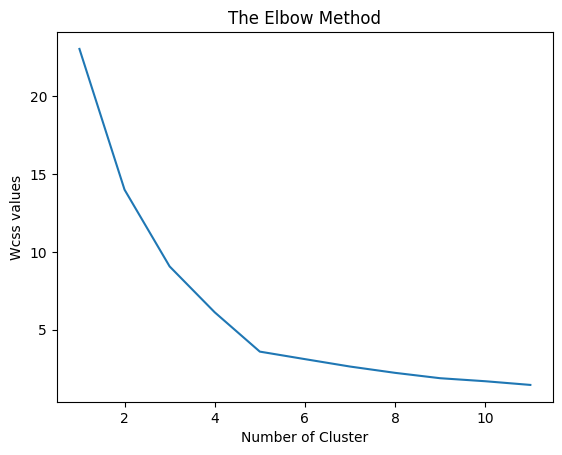

In [14]:
plt.plot(range(1,12),Wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("Wcss values")

## Training a model using Unsupervised Learning Algorithms (K-Means)

In [15]:
kmeans_model = KMeans(5)
kmeans_model.fit(x)

C:\Users\Chandan Kundan\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Chandan Kundan\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [16]:
df["cluster"] = kmeans_model.predict(x)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,4
1,2,Male,21,0.000000,0.816327,1
2,3,Female,20,0.008197,0.051020,4
3,4,Female,23,0.008197,0.775510,1
4,5,Female,31,0.016393,0.397959,4


## Output Visualization 

Text(0, 0.5, 'Spending Score (1-100)')

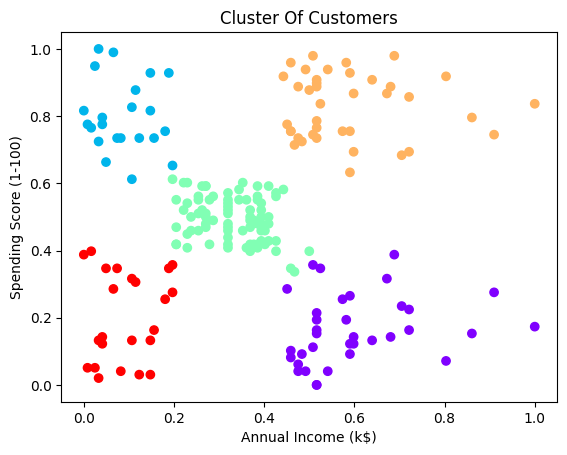

In [17]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=df['cluster'],cmap='rainbow')
plt.title("Cluster Of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")